In [1]:
%pip install rasterio

In [2]:
import numpy as np
import re
import rasterio
import matplotlib.pyplot as plt

In [3]:
band_number = int(input("Enter the band number (e.g., 1-9): "))

Enter the band number (e.g., 1-9): 4


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


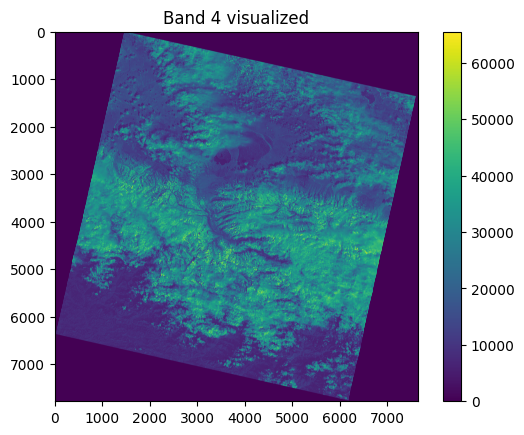

In [6]:
path = "/content/drive/MyDrive/RS_Lab/5/LC08_L1TP_144039_20250313_20250313_02_RT/"
meta_file = f"{path}LC08_L1TP_144039_20250313_20250313_02_RT_MTL.txt"
band_file = f"{path}LC08_L1TP_144039_20250313_20250313_02_RT_B{band_number}.TIF"

with rasterio.open(f"{band_file}") as src:
    gray_image = src.read(1)

plt.title(f"Band {band_number} visualized")
plt.imshow(gray_image)
plt.colorbar()
plt.show()

In [7]:
keys = {
    f"RADIANCE_MULT_BAND_{band_number}": None,
    f"RADIANCE_ADD_BAND_{band_number}": None,
    f"REFLECTANCE_MULT_BAND_{band_number}": None,
    f"REFLECTANCE_ADD_BAND_{band_number}": None,
    "SUN_ELEVATION": None
}
pattern = re.compile(r"(\w+)\s=\s([-]?\d+\.?\d*)")


In [8]:
with open(meta_file, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            key, value = match.groups()
            if key in keys:
                keys[key] = float(value)

print(keys)  # Output the extracted parameters

{'RADIANCE_MULT_BAND_4': 1.0114, 'RADIANCE_ADD_BAND_4': -50.56841, 'REFLECTANCE_MULT_BAND_4': 2.0, 'REFLECTANCE_ADD_BAND_4': -0.1, 'SUN_ELEVATION': 49.42483267}


In [9]:
sun_elevation = keys["SUN_ELEVATION"]
solar_zenith = 90 - sun_elevation
print(f"Solar Zenith Angle: {solar_zenith:.2f}°")

Solar Zenith Angle: 40.58°


In [10]:
with rasterio.open(band_file) as src:
    dn_image = src.read(1).astype(float)

In [11]:
radiance_mult = keys[f"RADIANCE_MULT_BAND_{band_number}"]
radiance_add = keys[f"RADIANCE_ADD_BAND_{band_number}"]
radiance = radiance_mult * dn_image + radiance_add

reflectance_mult = keys[f"REFLECTANCE_MULT_BAND_{band_number}"]
reflectance_add = keys[f"REFLECTANCE_ADD_BAND_{band_number}"]
reflectance = reflectance_mult * dn_image + reflectance_add

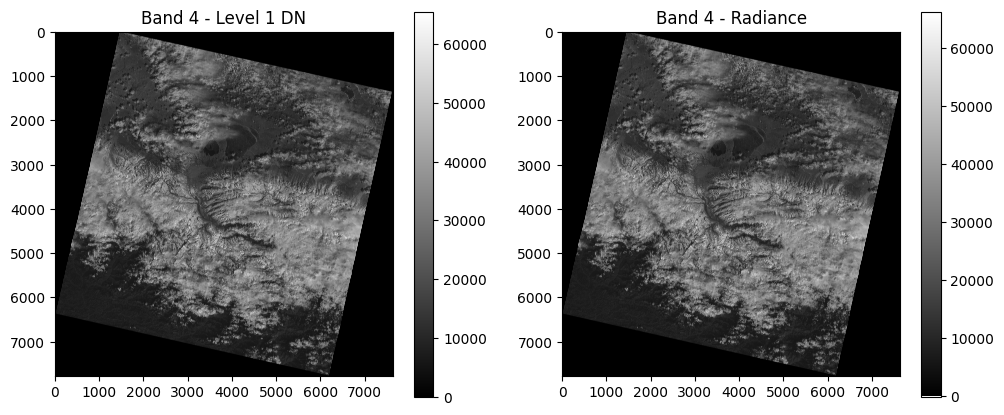

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title(f"Band {band_number} - Level 1 DN")
plt.imshow(dn_image, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title(f"Band {band_number} - Radiance")
plt.imshow(radiance, cmap='gray')
plt.colorbar()

plt.show()

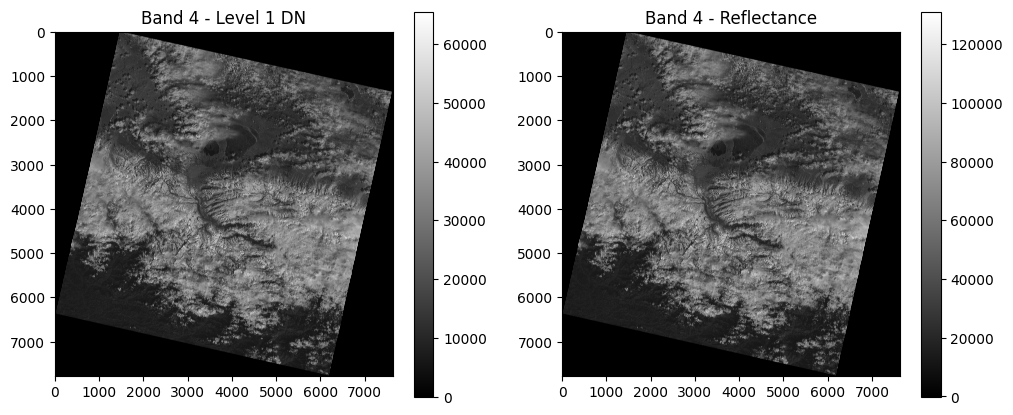

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title(f"Band {band_number} - Level 1 DN")
plt.imshow(dn_image, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title(f"Band {band_number} - Reflectance")
plt.imshow(reflectance, cmap='gray')
plt.colorbar()

plt.show()

In [14]:
nan_mask = np.isnan(dn_image)
num_nan_values = np.sum(nan_mask)
print(f"Number of NaN values in DN image: {num_nan_values}")

Number of NaN values in DN image: 0


In [15]:
mid_row = dn_image.shape[0] // 2
mid_col = dn_image.shape[1] // 2

middle_dn = dn_image[mid_row, mid_col]

if middle_dn == 0:
    mid_row = mid_row+1
    mid_col = mid_col

# Compute Radiance & Reflectance for the selected pixel
middle_radiance = radiance[mid_row, mid_col]
middle_reflectance = reflectance[mid_row, mid_col]

print(f"Selected Pixel (Row {mid_row}, Col {mid_col}):")
print(f"DN Value: {middle_dn}")
print(f"Radiance: {middle_radiance}")
print(f"Reflectance: {middle_reflectance}")


Selected Pixel (Row 3890, Col 3820):
DN Value: 30556.0
Radiance: 30853.76999
Reflectance: 61111.9
